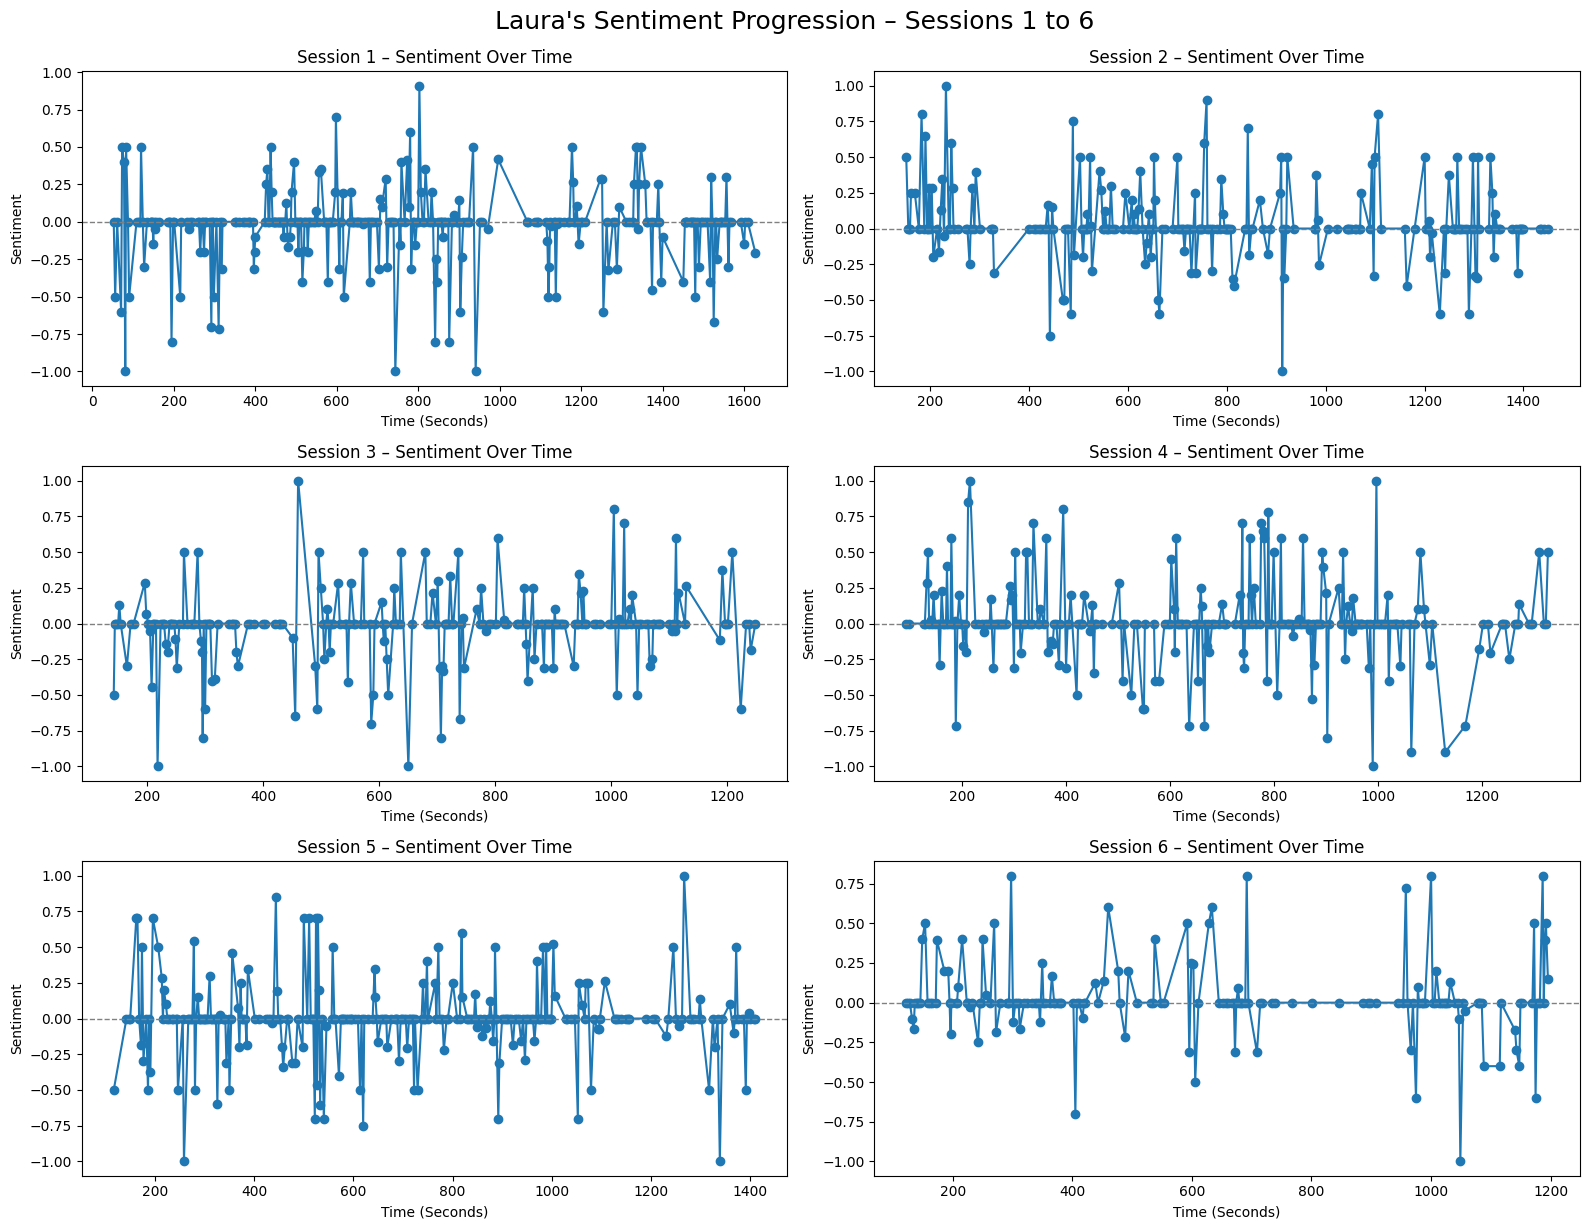

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

# Set your folder path here
folder_path = r"C:\Users\User\Desktop\Pratt\2025spring\ADV project\final project data"

# Prepare file names for Sessions 1 to 6
session_files = {
    f"Session {i}": os.path.join(folder_path, f"In_Treatment_Session {i}.xlsx")
    for i in range(1, 7)
}

# Helper function to convert Start Time to seconds
def convert_time_to_seconds(timestamp):
    try:
        time_str = timestamp.split(" --> ")[0]
        h, m, s = time_str.split(":")
        s, ms = s.split(",")
        return int(h) * 3600 + int(m) * 60 + int(s) + int(ms) / 1000
    except:
        return None

# Set up subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # make it easier to iterate

# Loop through sessions and plot each in a subplot
for idx, (session_name, file_path) in enumerate(session_files.items()):
    df = pd.read_excel(file_path)

    # Normalize and rename columns
    df.columns = [col.lower().strip() for col in df.columns]
    df.rename(columns={
        'dialogue': 'Dialogue',
        'speaker': 'Speaker',
        'start time': 'Start Time'
    }, inplace=True)

    # Filter only Laura's lines
    laura_lines = df[df['Speaker'].str.lower() == 'laura'].copy()

    # Convert time to seconds
    laura_lines['Time (Seconds)'] = laura_lines['Start Time'].apply(convert_time_to_seconds)
    laura_lines.dropna(subset=['Time (Seconds)'], inplace=True)

    # Sentiment analysis
    laura_lines['Sentiment'] = laura_lines['Dialogue'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Plot
    ax = axes[idx]
    ax.plot(laura_lines['Time (Seconds)'], laura_lines['Sentiment'], marker='o', linestyle='-')
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f"{session_name} – Sentiment Over Time")
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Sentiment")

# Layout adjustment
plt.tight_layout()
plt.suptitle("Laura's Sentiment Progression – Sessions 1 to 6", fontsize=18, y=1.02)
plt.show()


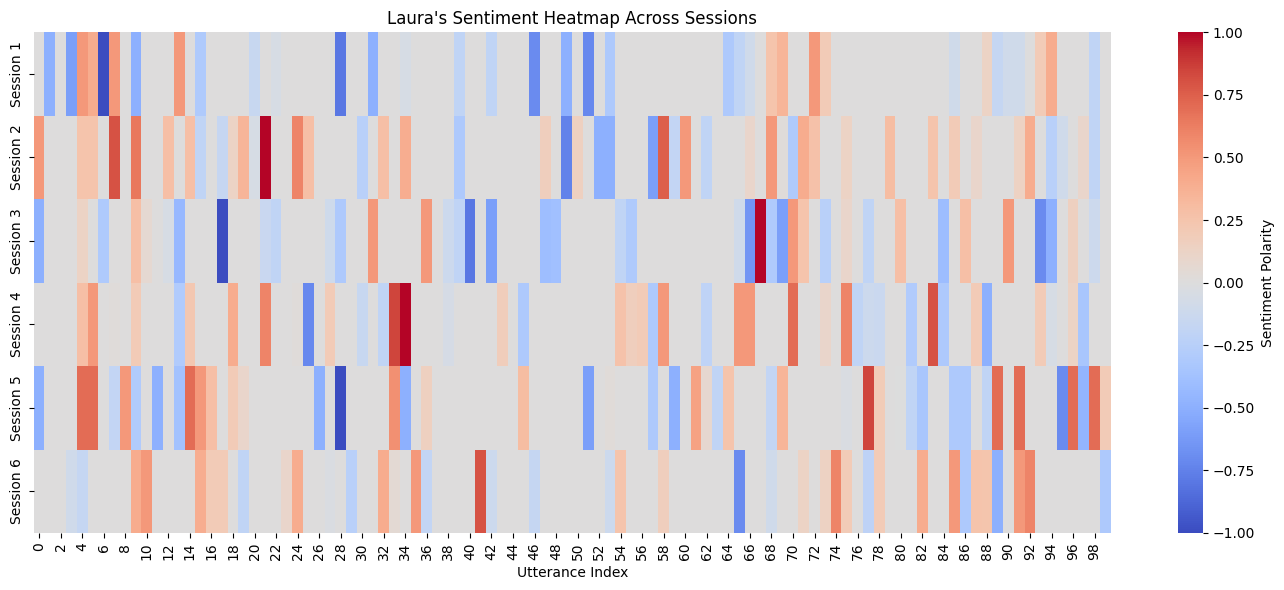

In [4]:
import seaborn as sns
import numpy as np

# Prepare a list to store sentiment scores per session
heatmap_data = []

# Loop through all sessions and collect Laura's sentiment scores
for session_name, file_path in session_files.items():
    df = pd.read_excel(file_path)
    df.columns = [col.lower().strip() for col in df.columns]  # Normalize column names
    df.rename(columns={'dialogue': 'Dialogue', 'speaker': 'Speaker'}, inplace=True)

    # Filter only Laura's dialogue
    laura_lines = df[df['Speaker'].str.lower() == 'laura']

    # Apply TextBlob to get sentiment polarity for each line
    sentiments = laura_lines['Dialogue'].apply(lambda x: TextBlob(str(x)).sentiment.polarity).tolist()

    # Limit to first 100 utterances per session for visualization consistency
    heatmap_data.append(sentiments[:100])

# Pad rows with NaN so all have equal length (needed for heatmap)
max_len = max(len(row) for row in heatmap_data)
heatmap_data_padded = [row + [np.nan] * (max_len - len(row)) for row in heatmap_data]

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data_padded,
    cmap="coolwarm",         # Blue = positive, Red = negative
    center=0,                # Centered around neutral sentiment
    cbar_kws={"label": "Sentiment Polarity"},
    yticklabels=[f"Session {i}" for i in range(1, 7)]
)
plt.xlabel("Utterance Index")
plt.title("Laura's Sentiment Heatmap Across Sessions")
plt.tight_layout()
plt.show()

